In [1]:
pip install pandas numpy

Note: you may need to restart the kernel to use updated packages.


In [105]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [106]:
# reading the data
data = pd.read_csv('house_price_prediction.csv')

In [258]:
# printing first 5 rows of dataset
data.head()

,Bedrooms,Bathrooms,Square Footage,Age of House,Price (in $1000s)
0,3,2,1500,10,300
1,4,3,2000,5,400
2,2,1,800,20,150
3,3,2,1600,8,320
4,5,4,3000,3,600


In [259]:
# y for our training set 
y_train = data['Price (in $1000s)']

In [260]:
# X for our training set shape : (10, 4) that means 10 examples with 4 features each
X_train = data.drop(columns=['Price (in $1000s)'])

In [261]:
print(y_train.shape)
print(X_train.shape)

(10,)
(10, 4)


In [262]:
# converting into numpy array
X_train = np.array(X_train)

In [263]:
# let's print the first example
X_train[0]

array([   3,    2, 1500,   10])

In [264]:
print(X_train[0].shape)

(4,)


In [265]:
n = len(X_train)

In [266]:
X_train = X_train.reshape(n, -1, 1)

In [267]:
X_train.shape

(10, 4, 1)

In [268]:
X_train[0].shape

(4, 1)

In [269]:
## defining the parameters
W = np.random.rand(X_train.shape[1], 1)
b = 0
print(W.shape)


(4, 1)


In [270]:
## length of training data
n = len(X_train)
print(n)

10


In [271]:
def model(X, W, b):
    # X shape is (4, 1) and W shape is (4, 1)
    return np.dot(W.T, X) + b ## predicted price which would be a number

In [272]:
# function to calculate dJ/dW for one example
def dw(y_pred, y, X):
    return (y_pred - y) * X

In [273]:
# function to calculate dJ/db for one example
def db(y_pred, y):
    return (y_pred - y)*1

In [274]:
# learning rate 
lr = 0.00000001

In [275]:
print(W)
print(b)

[[0.63237214]
 [0.51115456]
 [0.56078887]
 [0.25169098]]
0


W_new : [[0.63225794]
 [0.51107553]
 [0.50181331]
 [0.25147256]]
b_new : [[-2.96845136e-05]]


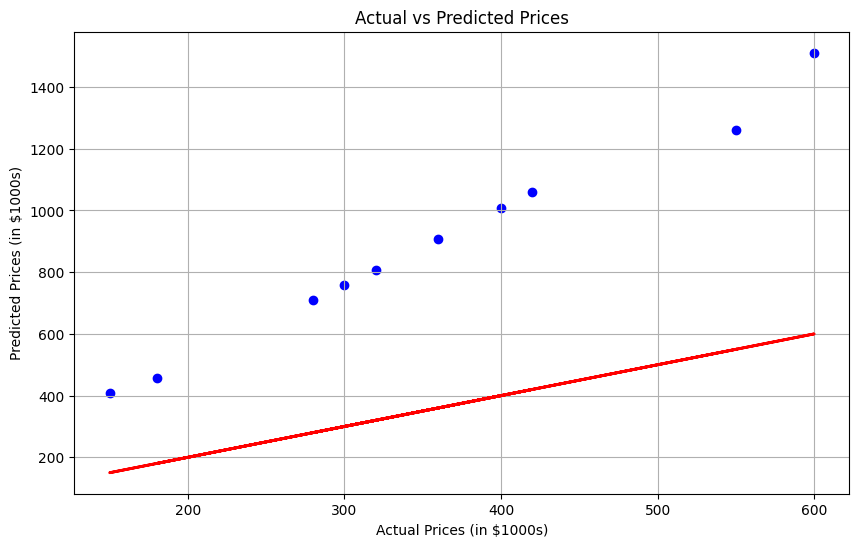

------------------------------------------------
W_new : [[0.63216243]
 [0.51100943]
 [0.45249171]
 [0.2512894 ]]
b_new : [[-5.45310191e-05]]


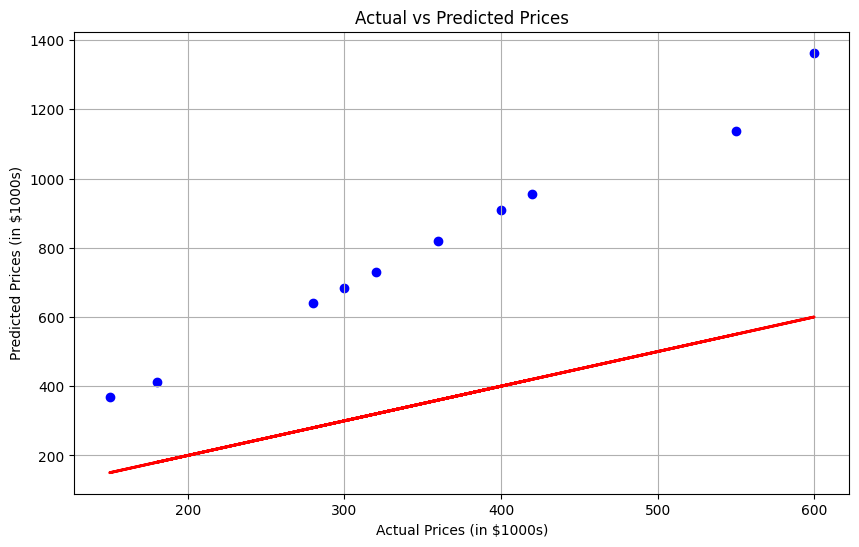

------------------------------------------------
W_new : [[0.63208256]
 [0.51095413]
 [0.41124378]
 [0.25113574]]
b_new : [[-7.53314712e-05]]


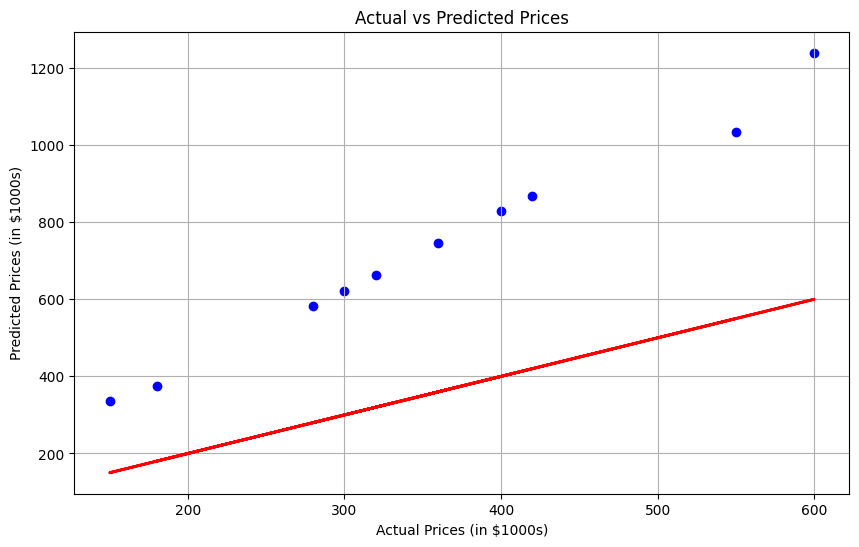

------------------------------------------------
W_new : [[0.63201575]
 [0.51090787]
 [0.37674792]
 [0.25100675]]
b_new : [[-9.27481861e-05]]


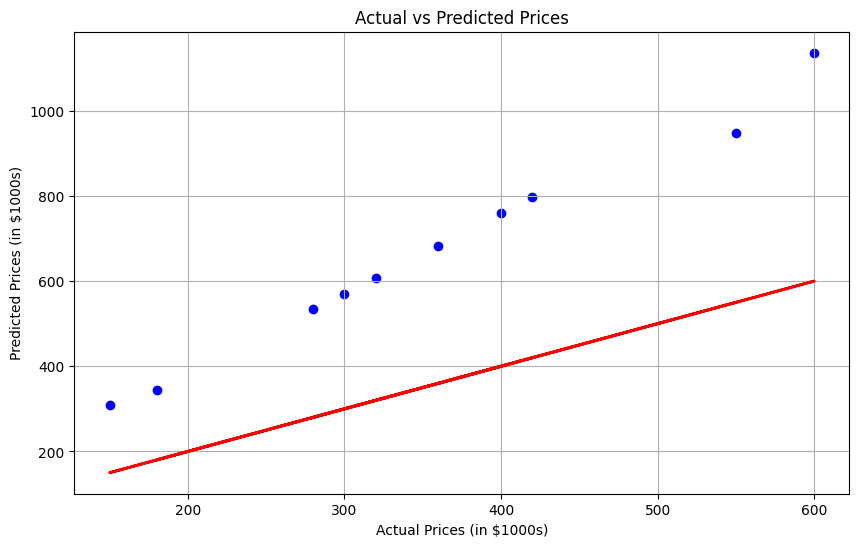

------------------------------------------------
W_new : [[0.63195988]
 [0.51086917]
 [0.34789883]
 [0.25089839]]
b_new : [[-0.00010734]]


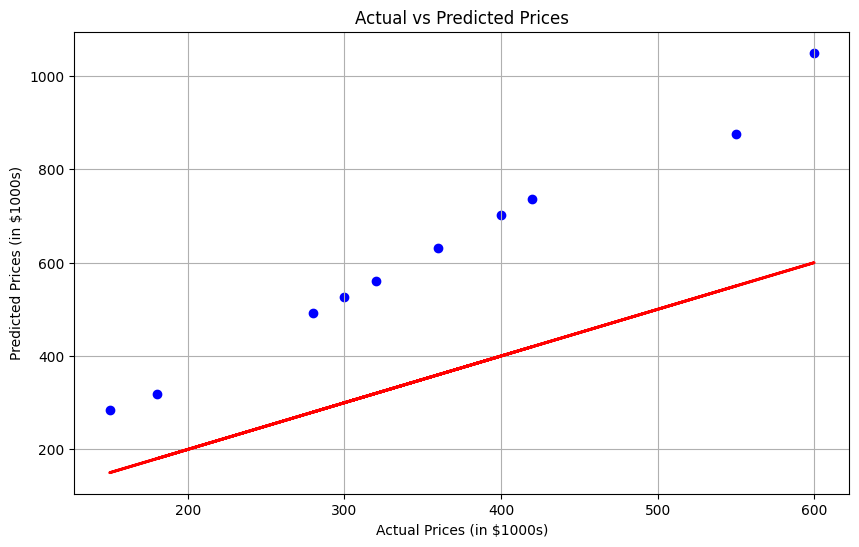

------------------------------------------------
W_new : [[0.63191316]
 [0.51083678]
 [0.32377218]
 [0.25080728]]
b_new : [[-0.00011956]]


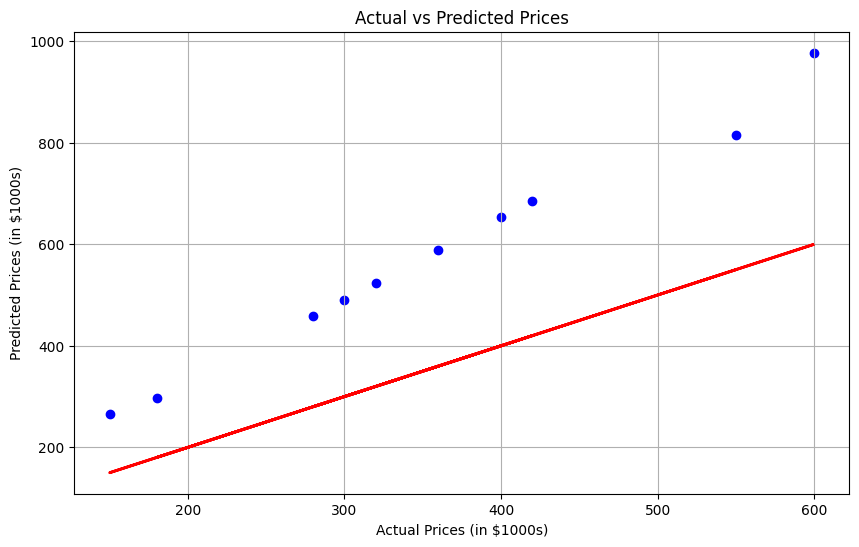

------------------------------------------------
W_new : [[0.63187408]
 [0.51080968]
 [0.30359492]
 [0.2507306 ]]
b_new : [[-0.0001298]]


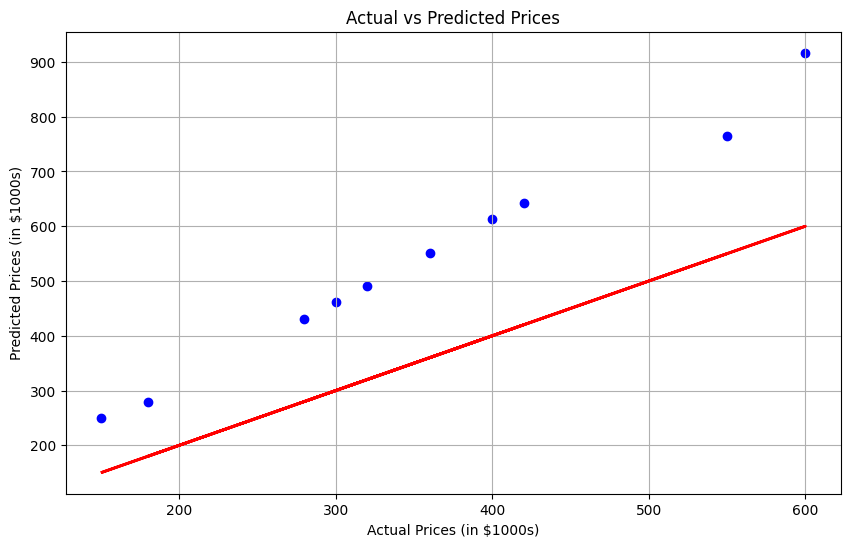

------------------------------------------------
W_new : [[0.6318414 ]
 [0.510787  ]
 [0.28672058]
 [0.25066598]]
b_new : [[-0.00013838]]


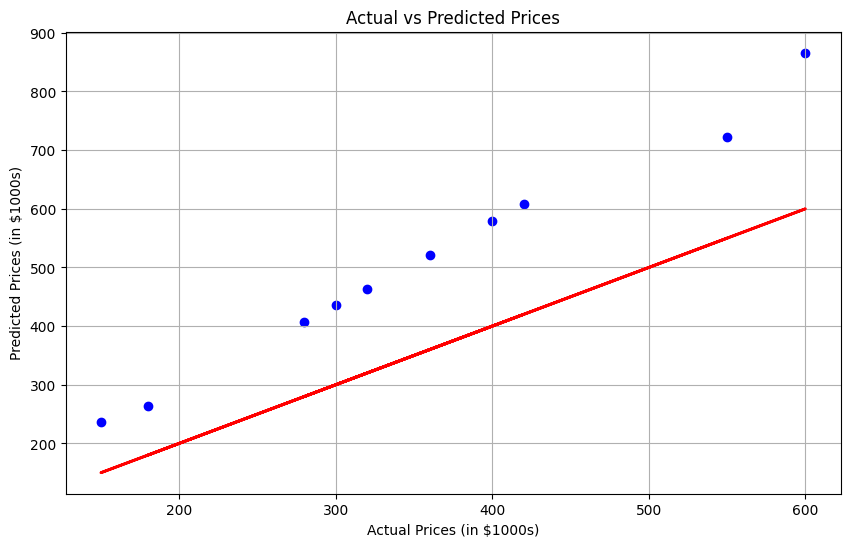

------------------------------------------------
W_new : [[0.63181407]
 [0.51076802]
 [0.27260847]
 [0.25061146]]
b_new : [[-0.00014558]]


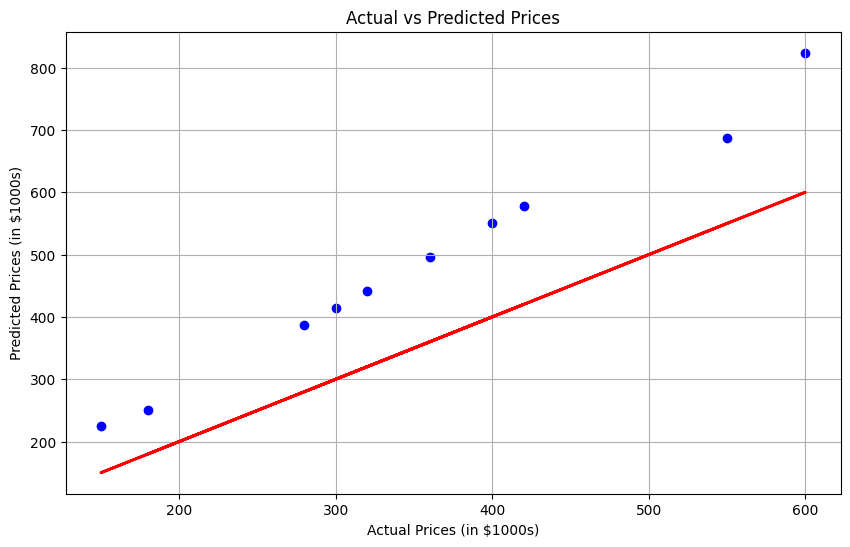

------------------------------------------------
W_new : [[0.6317912 ]
 [0.51075213]
 [0.26080643]
 [0.25056537]]
b_new : [[-0.00015163]]


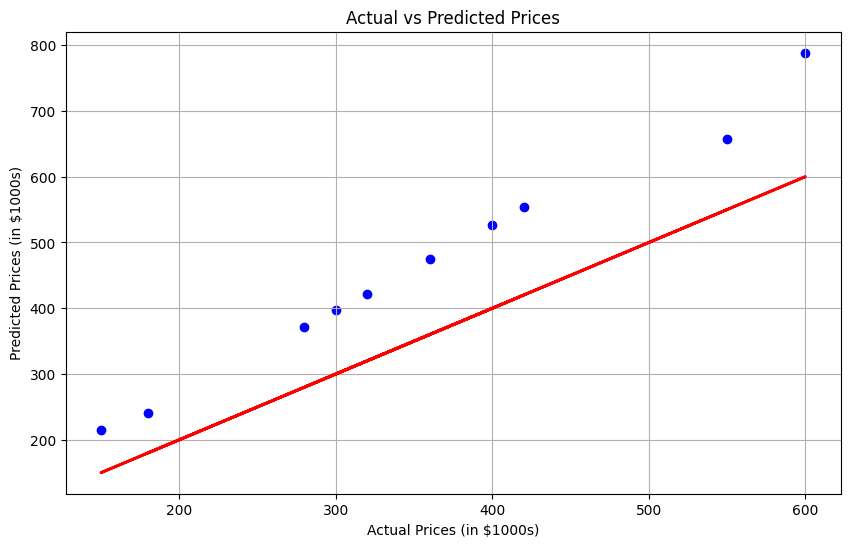

------------------------------------------------
W_new : [[0.63177208]
 [0.51073882]
 [0.25093632]
 [0.25052634]]
b_new : [[-0.0001567]]


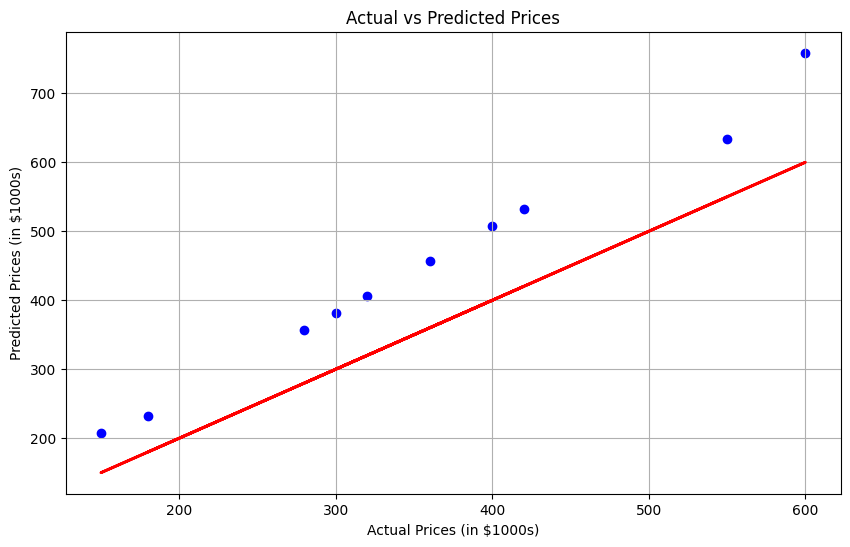

------------------------------------------------
W_new : [[0.63175609]
 [0.51072768]
 [0.2426819 ]
 [0.25049322]]
b_new : [[-0.00016097]]


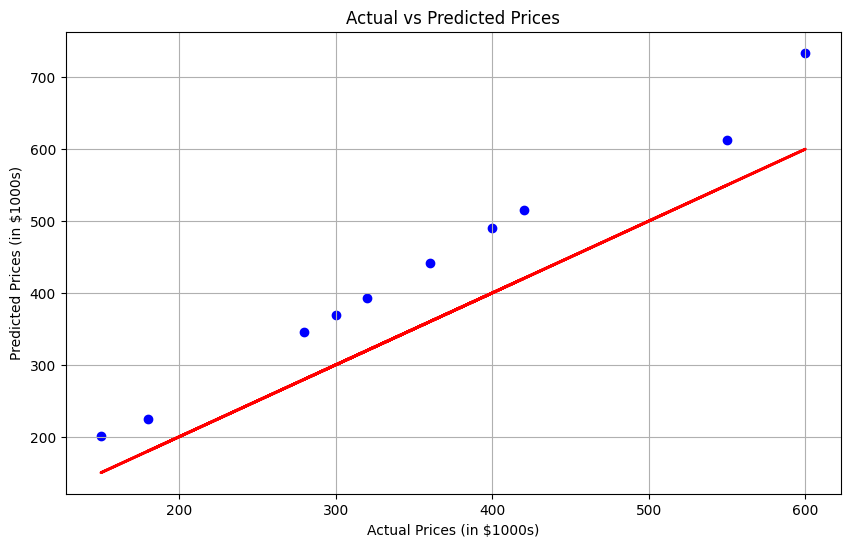

------------------------------------------------
W_new : [[0.63174271]
 [0.51071834]
 [0.23577868]
 [0.25046503]]
b_new : [[-0.00016456]]


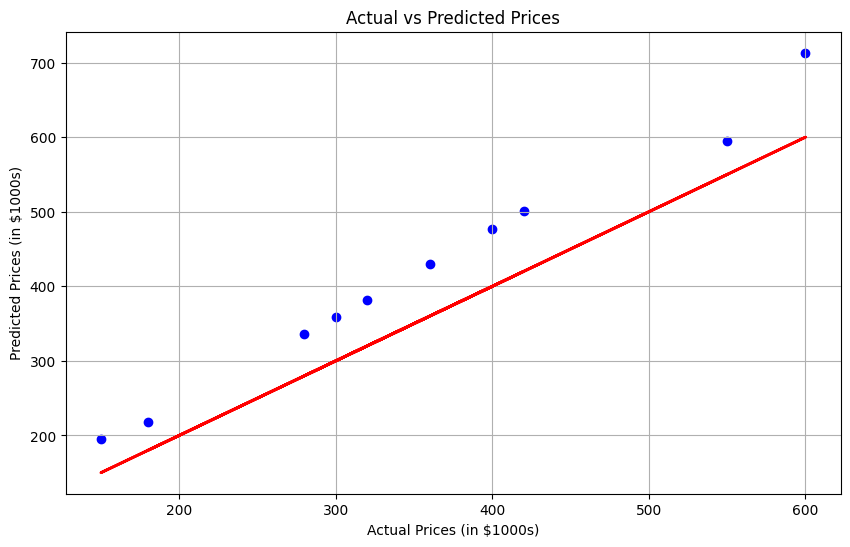

------------------------------------------------
W_new : [[0.63173153]
 [0.51071052]
 [0.23000548]
 [0.25044097]]
b_new : [[-0.00016758]]


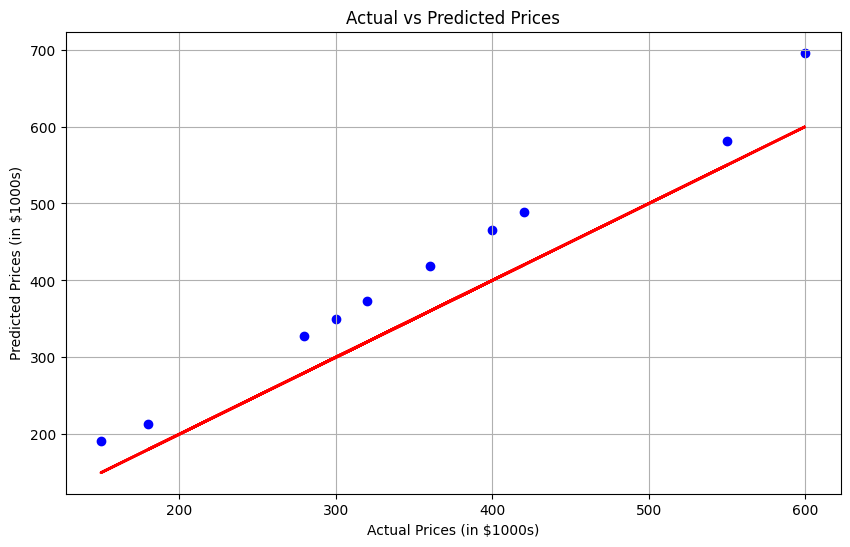

------------------------------------------------
W_new : [[0.63172217]
 [0.51070396]
 [0.22517733]
 [0.25042036]]
b_new : [[-0.00017013]]


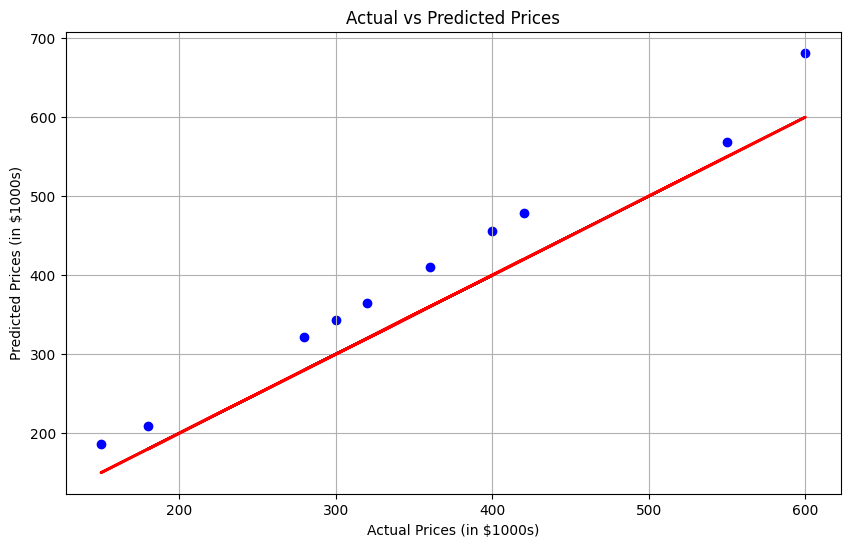

------------------------------------------------
W_new : [[0.63171434]
 [0.51069846]
 [0.22113951]
 [0.25040264]]
b_new : [[-0.00017228]]


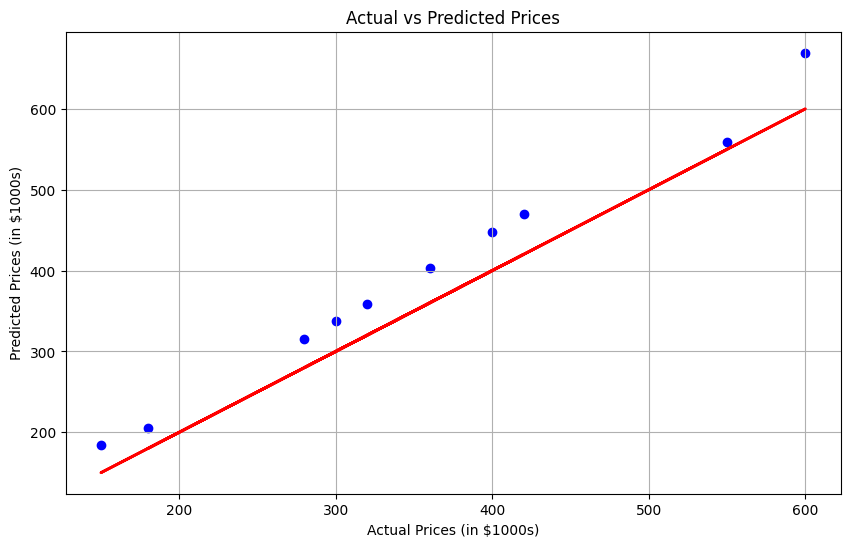

------------------------------------------------
W_new : [[0.63170779]
 [0.51069384]
 [0.21776267]
 [0.25038733]]
b_new : [[-0.0001741]]


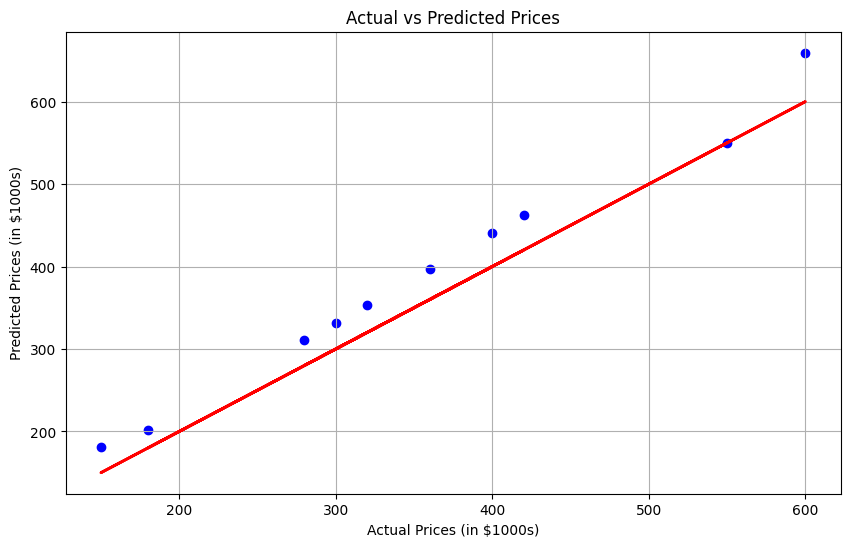

------------------------------------------------
W_new : [[0.63170231]
 [0.51068996]
 [0.2149386 ]
 [0.25037405]]
b_new : [[-0.00017565]]


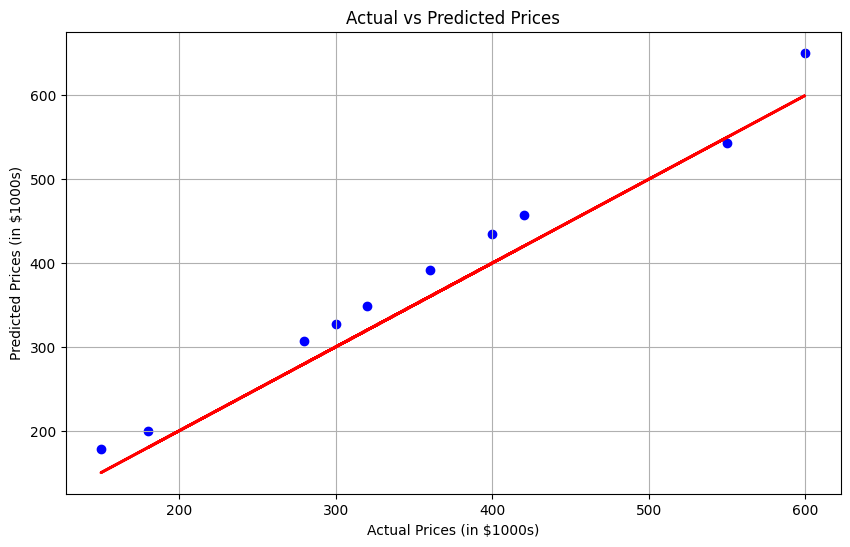

------------------------------------------------
W_new : [[0.63169773]
 [0.51068671]
 [0.21257681]
 [0.25036245]]
b_new : [[-0.00017696]]


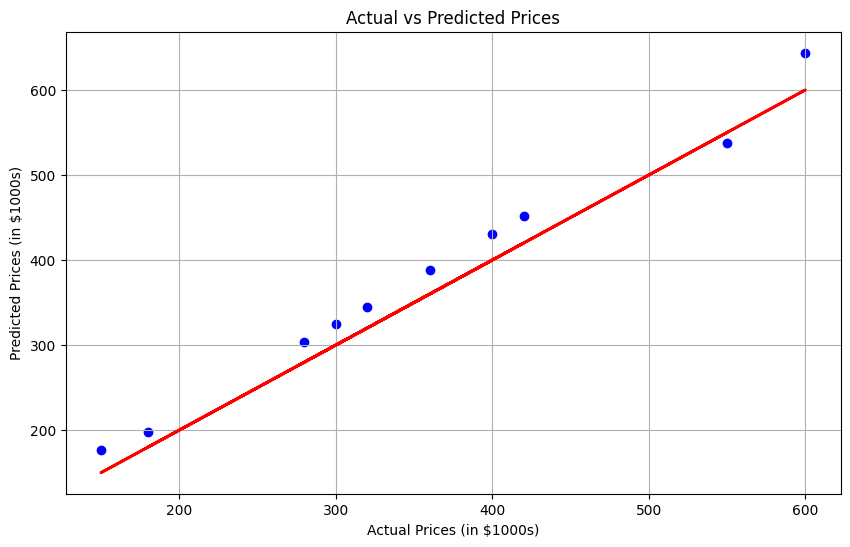

------------------------------------------------
W_new : [[0.63169389]
 [0.51068397]
 [0.21060164]
 [0.25035226]]
b_new : [[-0.00017808]]


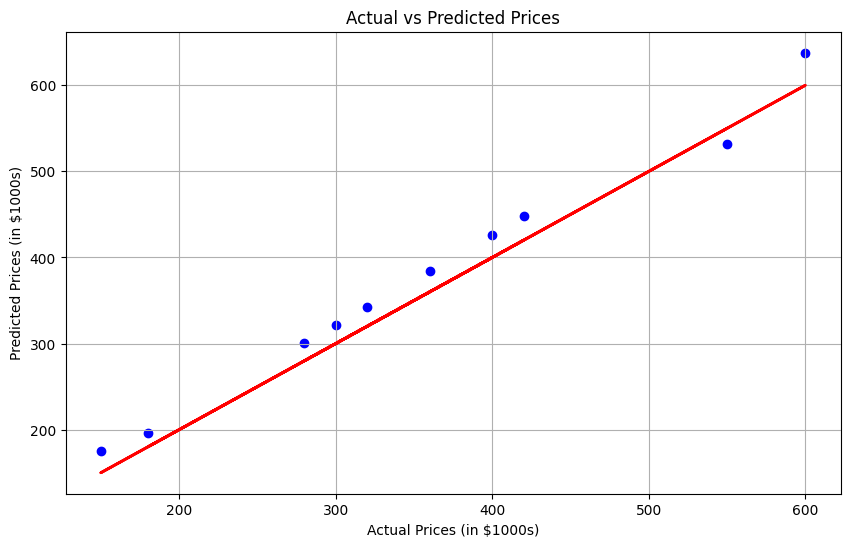

------------------------------------------------


In [276]:
##  gradient descent

for epoch in range(100):
    dW = np.zeros((4, 1))
    dB = 0
    for i in range(n):
        y_pred = model(X_train[i], W, b)
        ## loss function 1/2n * sum(y_pred - y)^2 
        dW += dw(y_pred, y_train[i], X_train[i])
        dB += db(y_pred, y_train[i])

    dW /= n
    dB /= n

    W = W - lr*dW
    b = b - lr*dB

    y_predicted = model(X_train, W, b)

    if((epoch+1)%5 == 0):
        print(f'W_new : {W}')
        print(f'b_new : {b}')
        plt.figure(figsize=(10, 6))
        plt.scatter(y_train, y_predicted, color='blue')
        plt.plot(y_train, y_train, color='red', linewidth=2)
        plt.xlabel('Actual Prices (in $1000s)')
        plt.ylabel('Predicted Prices (in $1000s)')
        plt.title('Actual vs Predicted Prices')
        plt.grid(True)
        plt.show()
        print("------------------------------------------------")

In [ ]:
## our model equation is f(X) = w1*x1 + w2*x2 + w3*x3 + w4*x4 + b